In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload
dataset = mre_pinn.data.MREDataset.load_xarrays('../data/NAFLD/v3', anat=True)

for i in range(len(dataset)):
    mre_pinn.baseline.eval_direct_baseline(dataset[i], frequency=40)

Loading ../data/NAFLD/v3/0006/wave.nc
Loading ../data/NAFLD/v3/0006/mre.nc
Loading ../data/NAFLD/v3/0006/mre_mask.nc
Loading ../data/NAFLD/v3/0006/anat.nc
Loading ../data/NAFLD/v3/0006/anat_mask.nc
Loading ../data/NAFLD/v3/0020/wave.nc
Loading ../data/NAFLD/v3/0020/mre.nc
Loading ../data/NAFLD/v3/0020/mre_mask.nc
Loading ../data/NAFLD/v3/0020/anat.nc
Loading ../data/NAFLD/v3/0020/anat_mask.nc
Loading ../data/NAFLD/v3/0024/wave.nc
Loading ../data/NAFLD/v3/0024/mre.nc
Loading ../data/NAFLD/v3/0024/mre_mask.nc
Loading ../data/NAFLD/v3/0024/anat.nc
Loading ../data/NAFLD/v3/0024/anat_mask.nc
Loading ../data/NAFLD/v3/0029/wave.nc
Loading ../data/NAFLD/v3/0029/mre.nc
Loading ../data/NAFLD/v3/0029/mre_mask.nc
Loading ../data/NAFLD/v3/0029/anat.nc
Loading ../data/NAFLD/v3/0029/anat_mask.nc
Loading ../data/NAFLD/v3/0043/wave.nc
Loading ../data/NAFLD/v3/0043/mre.nc
Loading ../data/NAFLD/v3/0043/mre_mask.nc
Loading ../data/NAFLD/v3/0043/anat.nc
Loading ../data/NAFLD/v3/0043/anat_mask.nc
Loading ..

Loading ../data/NAFLD/v3/0717/mre.nc
Loading ../data/NAFLD/v3/0717/mre_mask.nc
Loading ../data/NAFLD/v3/0717/anat.nc
Loading ../data/NAFLD/v3/0717/anat_mask.nc
Loading ../data/NAFLD/v3/0727/wave.nc
Loading ../data/NAFLD/v3/0727/mre.nc
Loading ../data/NAFLD/v3/0727/mre_mask.nc
Loading ../data/NAFLD/v3/0727/anat.nc
Loading ../data/NAFLD/v3/0727/anat_mask.nc
Loading ../data/NAFLD/v3/0734/wave.nc
Loading ../data/NAFLD/v3/0734/mre.nc
Loading ../data/NAFLD/v3/0734/mre_mask.nc
Loading ../data/NAFLD/v3/0734/anat.nc
Loading ../data/NAFLD/v3/0734/anat_mask.nc
Loading ../data/NAFLD/v3/0737/wave.nc
Loading ../data/NAFLD/v3/0737/mre.nc
Loading ../data/NAFLD/v3/0737/mre_mask.nc
Loading ../data/NAFLD/v3/0737/anat.nc
Loading ../data/NAFLD/v3/0737/anat_mask.nc
Loading ../data/NAFLD/v3/0740/wave.nc
Loading ../data/NAFLD/v3/0740/mre.nc
Loading ../data/NAFLD/v3/0740/mre_mask.nc
Loading ../data/NAFLD/v3/0740/anat.nc
Loading ../data/NAFLD/v3/0740/anat_mask.nc
Loading ../data/NAFLD/v3/0747/wave.nc
Loading ..

Loading ../data/NAFLD/v3/1311/mre.nc
Loading ../data/NAFLD/v3/1311/mre_mask.nc
Loading ../data/NAFLD/v3/1311/anat.nc
Loading ../data/NAFLD/v3/1311/anat_mask.nc
Loading ../data/NAFLD/v3/1329/wave.nc
Loading ../data/NAFLD/v3/1329/mre.nc
Loading ../data/NAFLD/v3/1329/mre_mask.nc
Loading ../data/NAFLD/v3/1329/anat.nc
Loading ../data/NAFLD/v3/1329/anat_mask.nc
Loading ../data/NAFLD/v3/1337/wave.nc
Loading ../data/NAFLD/v3/1337/mre.nc
Loading ../data/NAFLD/v3/1337/mre_mask.nc
Loading ../data/NAFLD/v3/1337/anat.nc
Loading ../data/NAFLD/v3/1337/anat_mask.nc
Loading ../data/NAFLD/v3/1341/wave.nc
Loading ../data/NAFLD/v3/1341/mre.nc
Loading ../data/NAFLD/v3/1341/mre_mask.nc
Loading ../data/NAFLD/v3/1341/anat.nc
Loading ../data/NAFLD/v3/1341/anat_mask.nc
Loading ../data/NAFLD/v3/1343/wave.nc
Loading ../data/NAFLD/v3/1343/mre.nc
Loading ../data/NAFLD/v3/1343/mre_mask.nc
Loading ../data/NAFLD/v3/1343/anat.nc
Loading ../data/NAFLD/v3/1343/anat_mask.nc
Loading ../data/NAFLD/v3/1344/wave.nc
Loading ..

Loading ../data/NAFLD/v3/1853/mre_mask.nc
Loading ../data/NAFLD/v3/1853/anat.nc
Loading ../data/NAFLD/v3/1853/anat_mask.nc
Loading ../data/NAFLD/v3/1896/wave.nc
Loading ../data/NAFLD/v3/1896/mre.nc
Loading ../data/NAFLD/v3/1896/mre_mask.nc
Loading ../data/NAFLD/v3/1896/anat.nc
Loading ../data/NAFLD/v3/1896/anat_mask.nc
Loading ../data/NAFLD/v3/1899/wave.nc
Loading ../data/NAFLD/v3/1899/mre.nc
Loading ../data/NAFLD/v3/1899/mre_mask.nc
Loading ../data/NAFLD/v3/1899/anat.nc
Loading ../data/NAFLD/v3/1899/anat_mask.nc
Loading ../data/NAFLD/v3/1903/wave.nc
Loading ../data/NAFLD/v3/1903/mre.nc
Loading ../data/NAFLD/v3/1903/mre_mask.nc
Loading ../data/NAFLD/v3/1903/anat.nc
Loading ../data/NAFLD/v3/1903/anat_mask.nc
Loading ../data/NAFLD/v3/1917/wave.nc
Loading ../data/NAFLD/v3/1917/mre.nc
Loading ../data/NAFLD/v3/1917/mre_mask.nc
Loading ../data/NAFLD/v3/1917/anat.nc
Loading ../data/NAFLD/v3/1917/anat_mask.nc
Loading ../data/NAFLD/v3/1935/wave.nc
Loading ../data/NAFLD/v3/1935/mre.nc
Loading ..

In [4]:
%autoreload
metadata = dataset.metadata
metadata

size   spacing    origin     limit    center  \
example_id variable dimension                                                 
0006       wave     x           256  0.002813 -0.413808  0.303405 -0.055202   
                    y           256  0.002813 -0.391718  0.325495 -0.033112   
                    z             4  0.022000 -0.002113  0.063887  0.030887   
           mre      x           256  0.002813 -0.413808  0.303405 -0.055202   
                    y           256  0.002813 -0.391718  0.325495 -0.033112   
...                             ...       ...       ...       ...       ...   
2046       Lu       y           256  0.002969 -0.418516  0.338528 -0.039994   
                    z             4  0.022000 -0.184306 -0.118306 -0.151306   
           direct   x           256  0.002969 -0.346072  0.410972  0.032450   
                    y           256  0.002969 -0.418516  0.338528 -0.039994   
                    z             4  0.022000 -0.184306 -0.118306 -0.151306   

                                 extent  
example_id variable dimension            
0006       wave     x          0.720026  
                    y          0.720026  
                    z          0.088000  
           mre      x          0.720026  
                    y          0.720026  
...                                 ...  
2046       Lu       y          0.760013  
                    z          0.088000  
           direct   x          0.760013  
                    y          0.760013  
                    z          0.088000  

[3255 rows x 6 columns]

In [5]:
stats = dataset.describe()
stats

100%|██████████| 155/155 [00:40<00:00,  3.86it/s]


dtype      count         mean  \
example_id variable  component                                     
0006       wave      scalar      float64   262144.0     0.000139   
           mre       scalar        int16   262144.0  1505.871937   
           mre_mask  scalar      float32   262144.0     0.171467   
           anat      t1_pre_in   float32  1048576.0   230.895905   
                     t1_pre_out  float32  1048576.0   191.832916   
...                                  ...        ...          ...   
2046       anat      t1_pre_fat  float32  1048576.0   159.895660   
                     t2          float32  1048576.0    85.836647   
           anat_mask scalar        int64  1048576.0     0.043960   
           Lu        scalar      float64   262144.0    -0.631671   
           direct    scalar      float64   262144.0   457.022275   

                                          std           min         25%  \
example_id variable  component                                            
0006       wave      scalar          0.023588 -9.960938e-02   -0.004492   
           mre       scalar       1335.735833  0.000000e+00    0.000000   
           mre_mask  scalar          0.376916  0.000000e+00    0.000000   
           anat      t1_pre_in     333.844757 -9.803505e+00    0.001997   
                     t1_pre_out    289.733734 -6.681190e+00    0.760779   
...                                       ...           ...         ...   
2046       anat      t1_pre_fat    311.322906 -3.732314e+00    0.000002   
                     t2            126.238159 -2.411198e+01    0.000000   
           anat_mask scalar          0.205005  0.000000e+00    0.000000   
           Lu        scalar        939.363163 -1.018843e+04 -104.849239   
           direct    scalar      10699.761972 -2.190320e+06   -0.000000   

                                         50%          75%           max  
example_id variable  component                                           
0006       wave      scalar         0.000000     0.004736  9.960938e-02  
           mre       scalar      1340.000000  2212.000000  1.407800e+04  
           mre_mask  scalar         0.000000     0.000000  1.000000e+00  
           anat      t1_pre_in     42.894855   372.497162  3.701143e+03  
                     t1_pre_out    43.586727   286.150490  3.311284e+03  
...                                      ...          ...           ...  
2046       anat      t1_pre_fat    19.242697   133.978127  2.242132e+03  
                     t2             4.127047   149.600464  9.198416e+02  
           anat_mask scalar         0.000000     0.000000  1.000000e+00  
           Lu        scalar         0.000000   105.054423  1.234656e+04  
           direct    scalar        -0.000000   851.348164  1.769104e+06  

[1705 rows x 9 columns]

In [6]:
%autoreload
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=40, detach=True)

In [7]:
%autoreload
pinn = mre_pinn.model.MREPINO(
    dataset,
    n_channels_block=(16, 16),
    n_conv_per_block=(2, 2),
    n_conv_blocks=(5, 5),
    activ_fn='g',
    n_latent=128,
    width_factor=2,
    n_pinn_layers=5,
    n_pinn_hidden=128,
    polar_input=True,
    conditional=True,
    parallel=False,
    omega=60
)
pinn

  metadata = metadata.reset_index().groupby(['variable', 'dimension']).mean()

  stats = stats.reset_index().groupby(['variable', 'component']).mean()



MREPINO(
  (u_cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
  

In [11]:
%autoreload
model = mre_pinn.training.MREPINOModel(
    dataset, dataset, pinn, pde,
    loss_weights=[1, 0, 1e-16],
    pde_warmup_iters=20000,
    pde_step_iters=10000,
    pde_init_weight=1e-18,
    n_points=4096,
    batch_size=8
)
model.compile(optimizer='adam', lr=1e-5, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000592 s



In [ ]:
%autoreload

weights, biases = model.view_weights()
u_weights, mu_weights = weights
u_biases, mu_biases = biases

fig, ax = plt.subplots(4, 2, figsize=(6, 6))

get_values = lambda x: x.detach().cpu().numpy().flatten()

for i in range(4):
    ax[i,0].hist(get_values(u_weights[i]))
    ax[i,1].hist(get_values(u_biases[i]))
    ax[i,0].set_xlim(-6, 6)
    ax[i,1].set_xlim(-6, 6)
    
fig.tight_layout()

In [12]:
%autoreload
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100, debug=False)

# iterations: 100
Data time/iter:  0.7154s (96.94%)
Model time/iter: 0.0147s (1.99%)
Loss time/iter:  0.0078s (1.06%)
Total time/iter: 0.7380s
Total time: 73.7971s
1k iters time: 12.30m
10k iters time: 123.00m
100k iters time: 20.50h


<IPython.core.display.Javascript object>


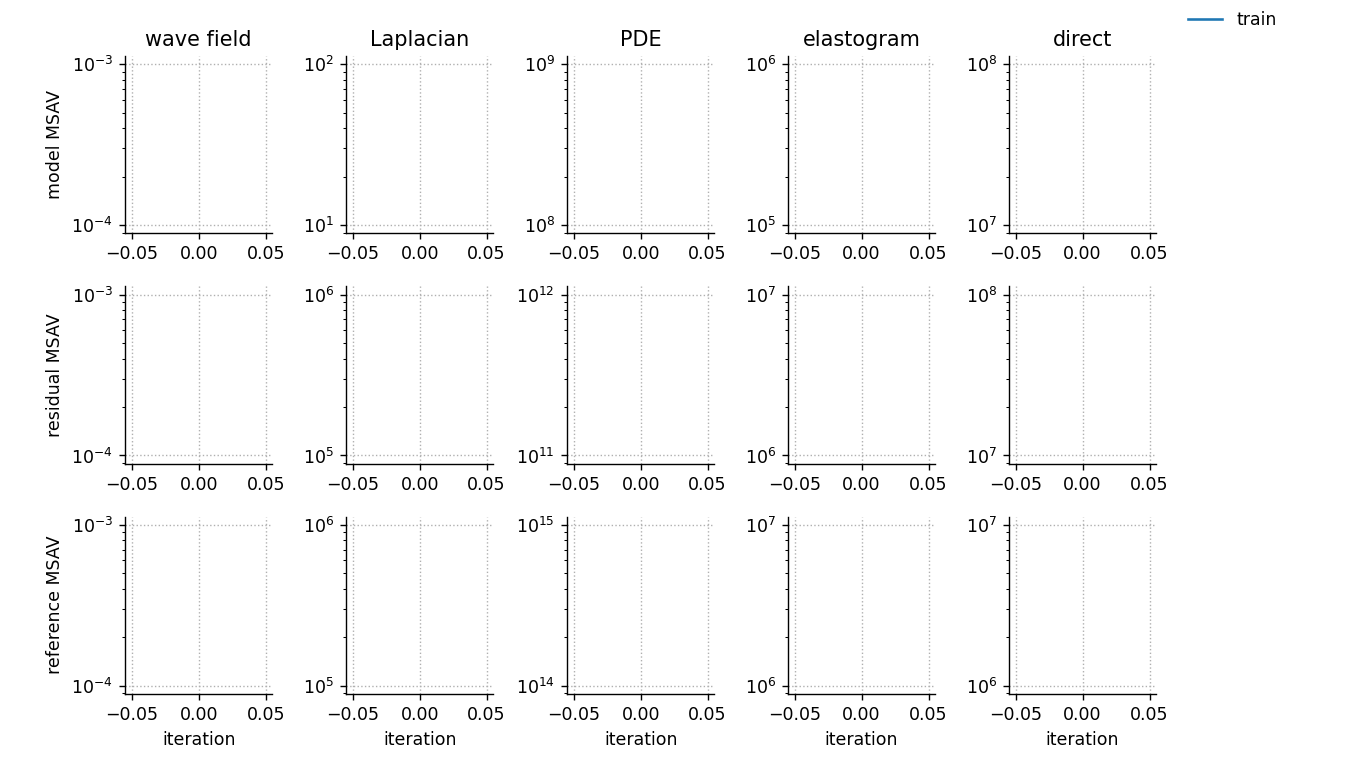

<IPython.core.display.Javascript object>


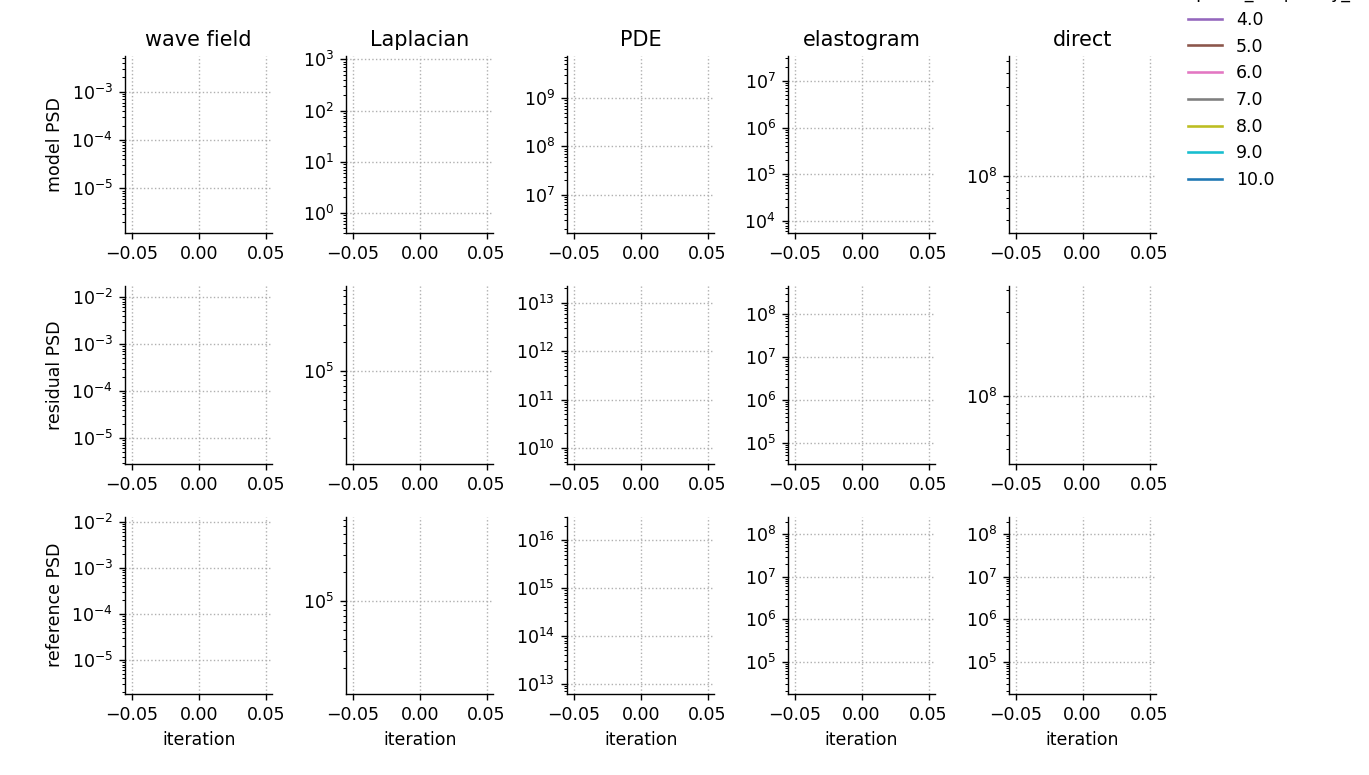

<IPython.core.display.Javascript object>


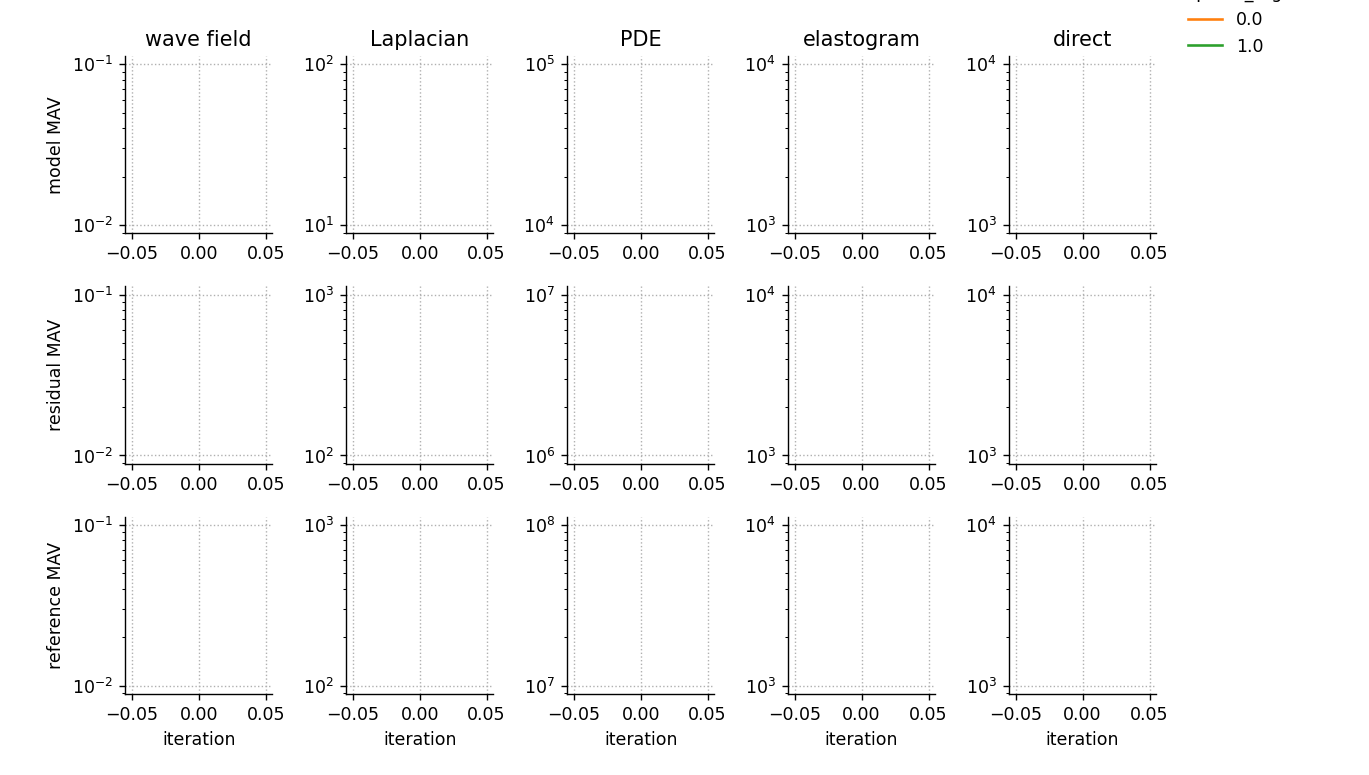

<IPython.core.display.Javascript object>


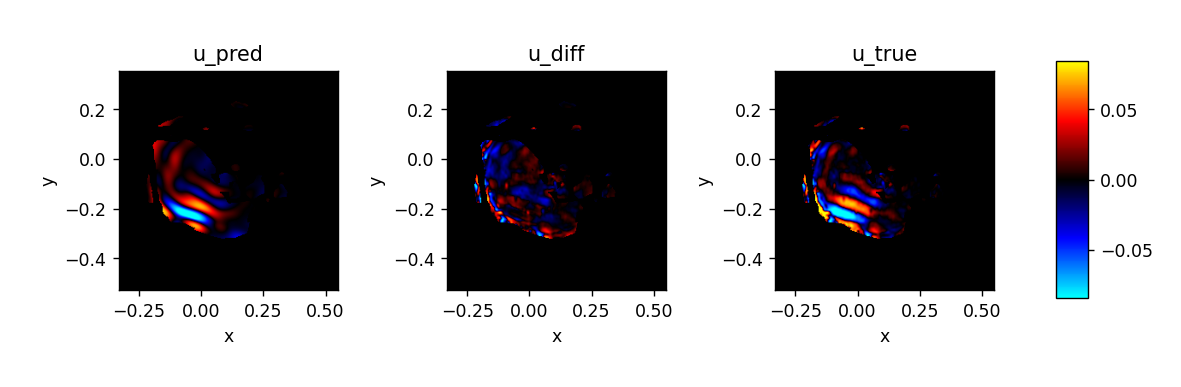

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


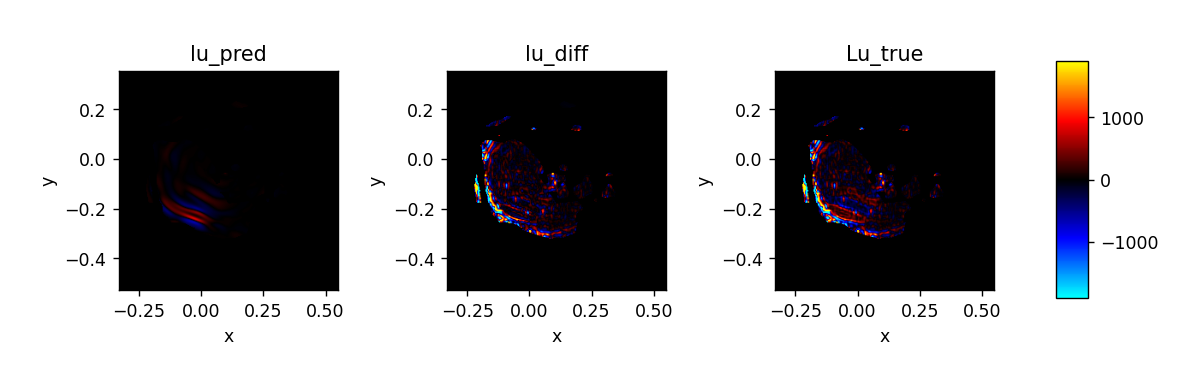

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


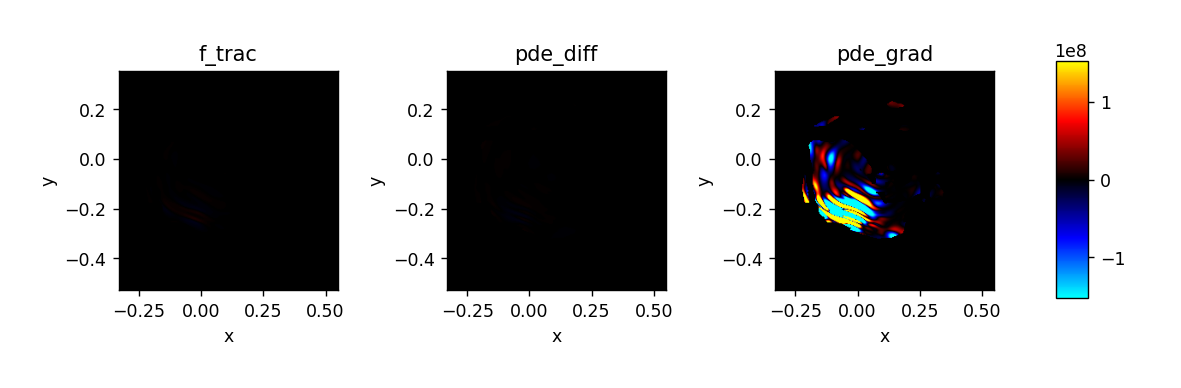

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


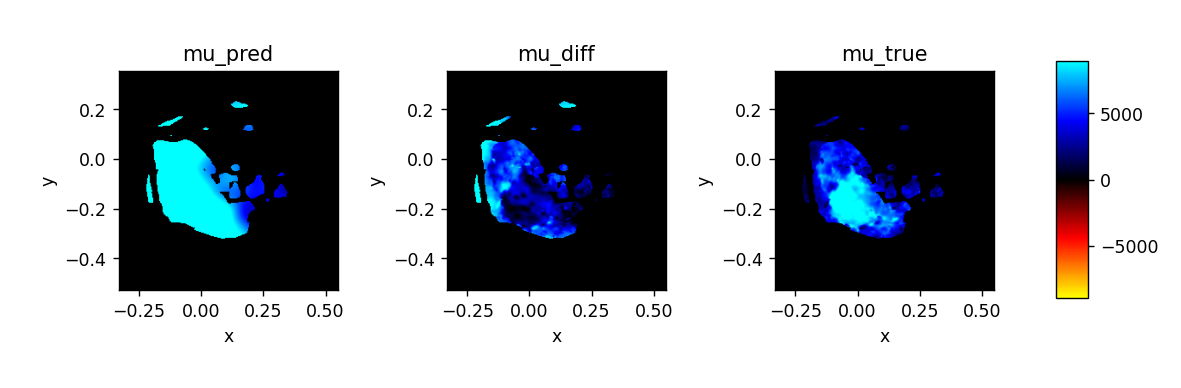

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


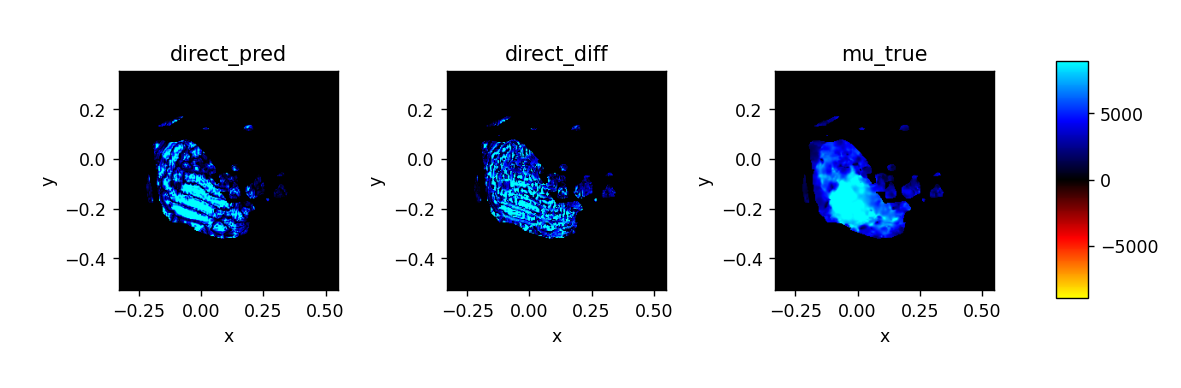

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [13]:
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.13e-03, 0.00e+00, 0.00e+00]    [2.80e-03, 0.00e+00, 0.00e+00]    []  


<IPython.core.display.Javascript object>


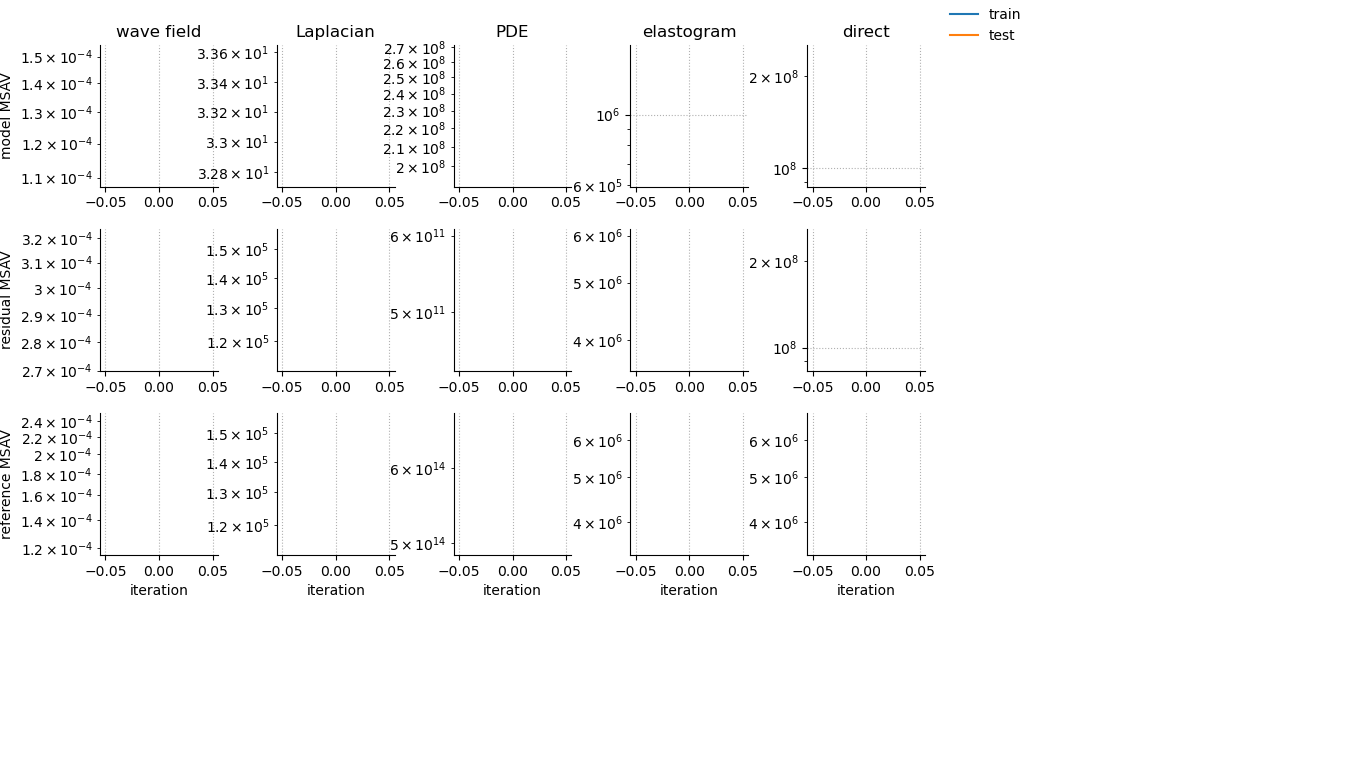

<IPython.core.display.Javascript object>


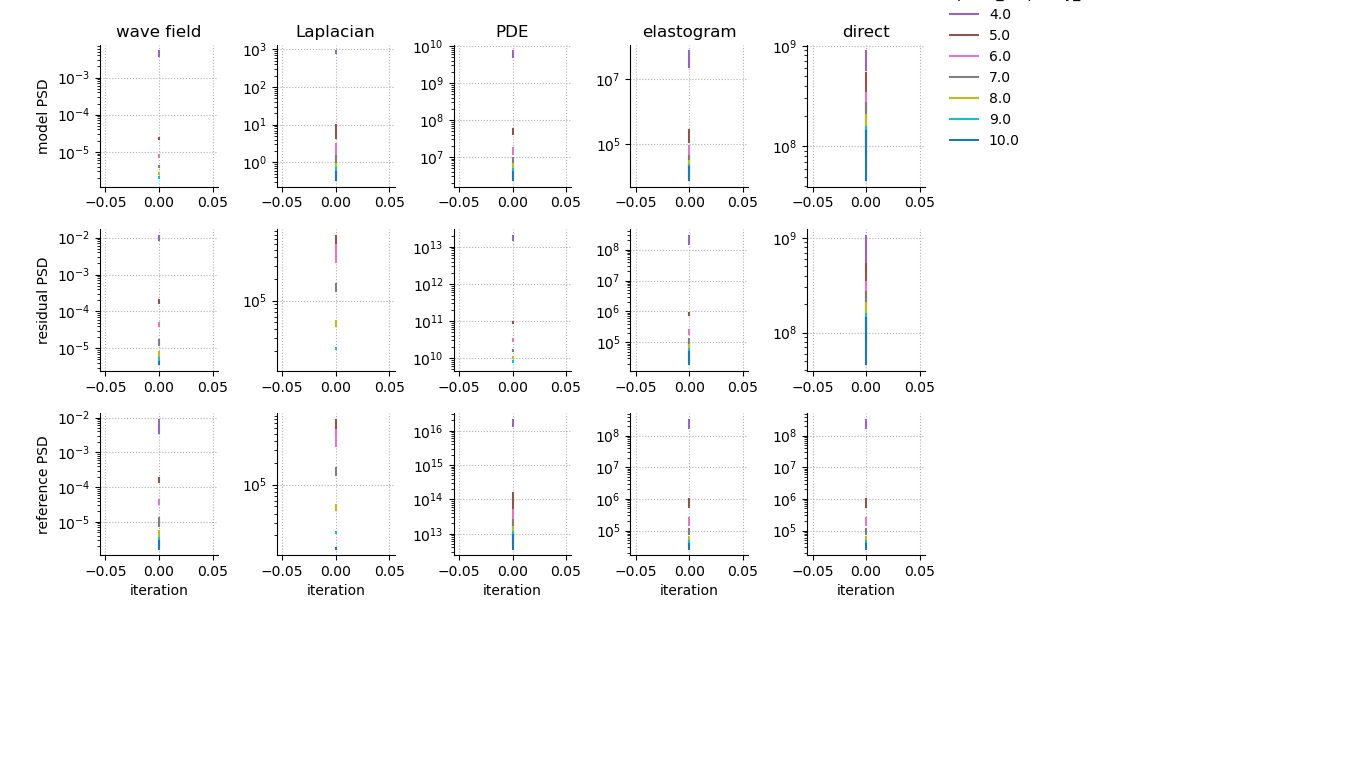

<IPython.core.display.Javascript object>


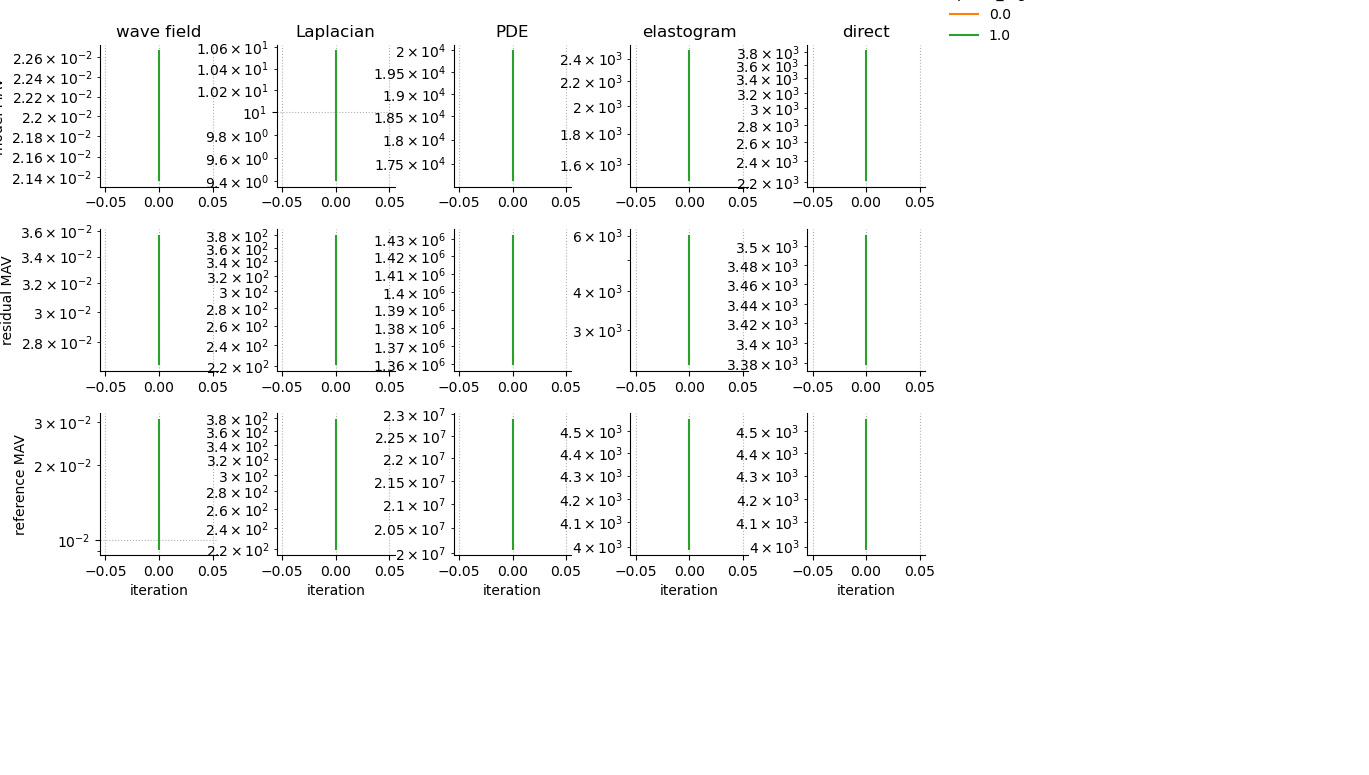

Time spent testing: 19.4220 (29.14%)


<IPython.core.display.Javascript object>


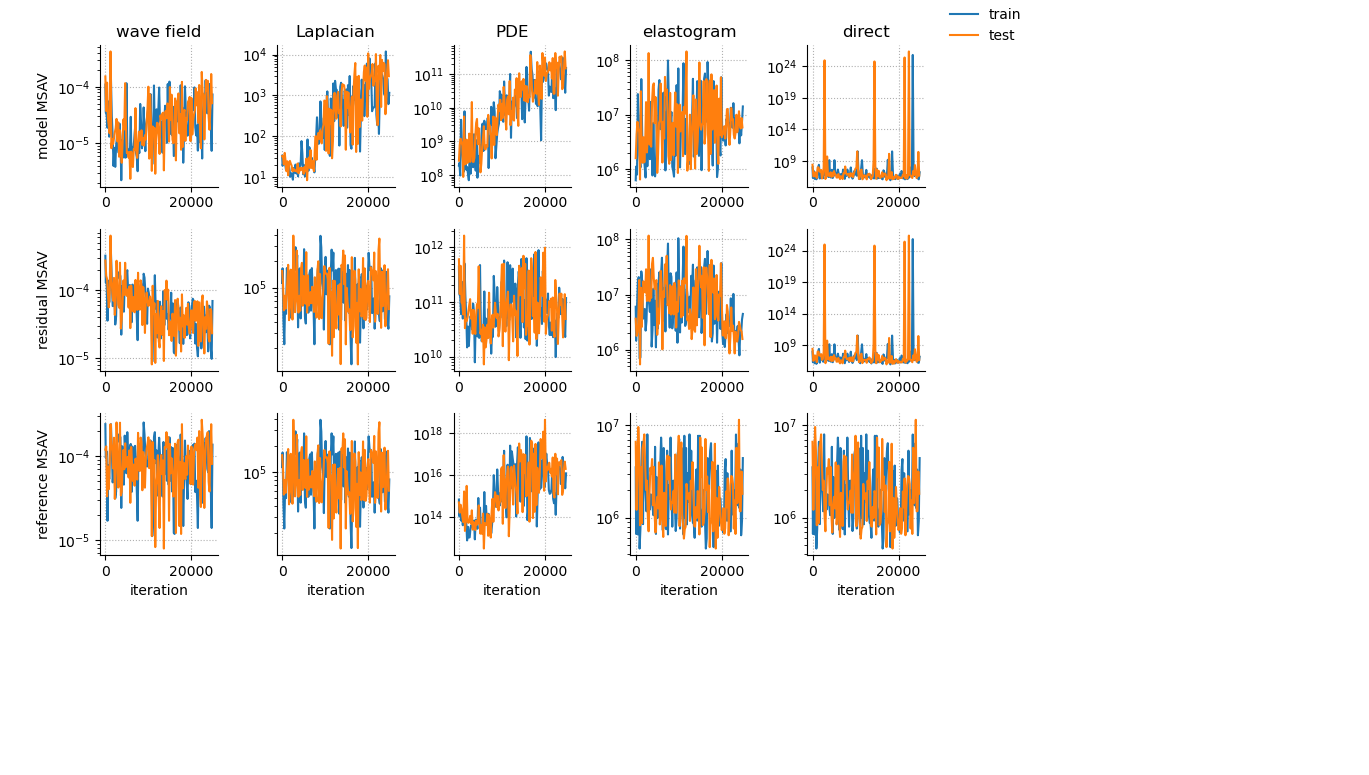

<IPython.core.display.Javascript object>


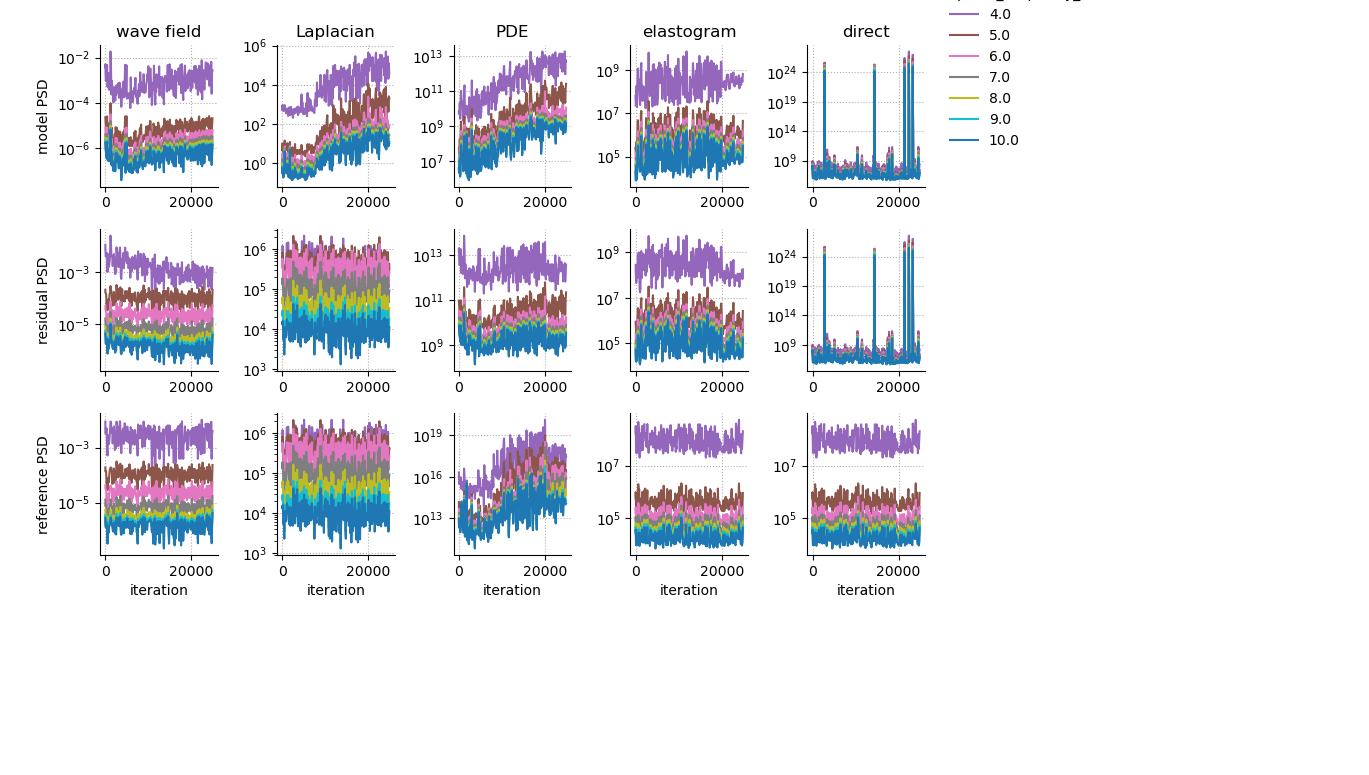

<IPython.core.display.Javascript object>


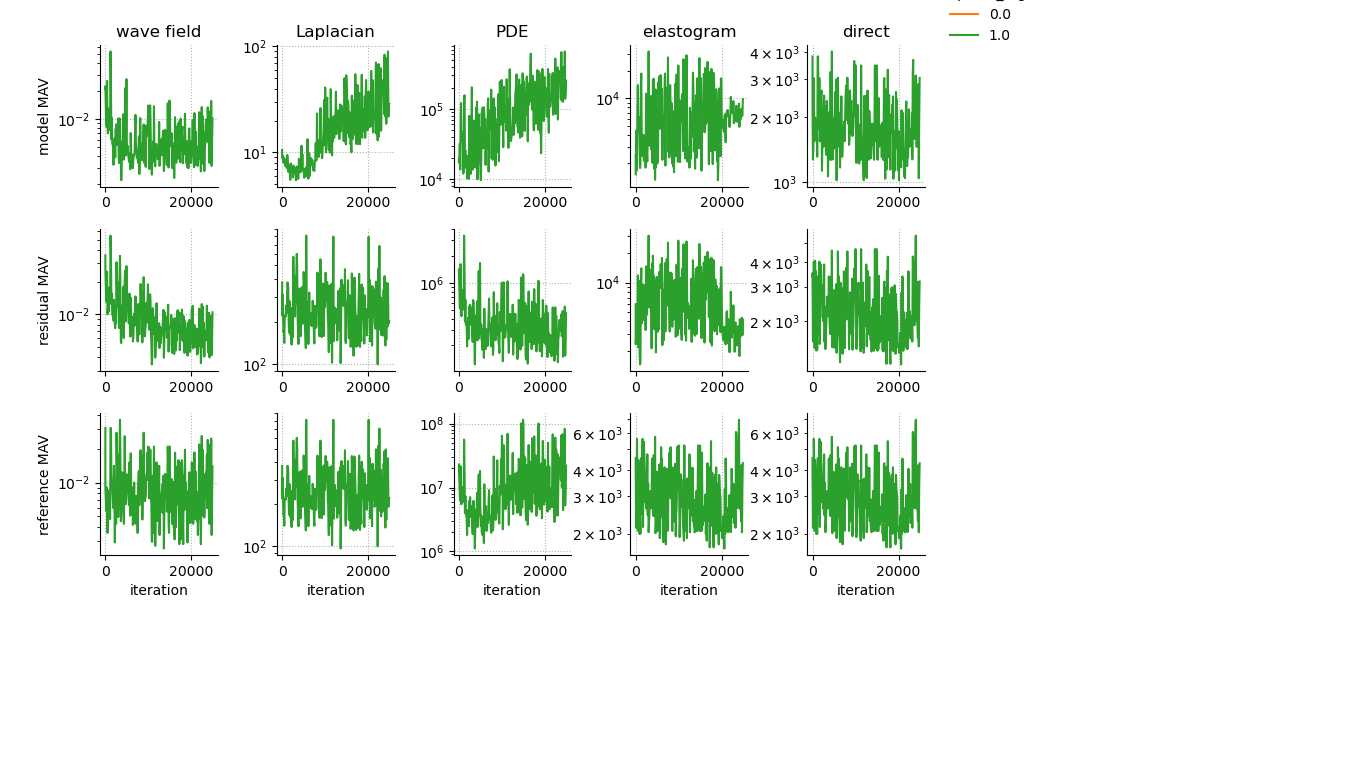

Time spent testing: 19.7268 (14.92%)
Time spent testing: 17.6737 (12.49%)
Time spent testing: 18.2669 (11.59%)
Time spent testing: 17.6265 (11.03%)
Time spent testing: 17.6762 (10.69%)
Time spent testing: 17.6088 (10.44%)
Time spent testing: 17.5027 (10.26%)
Time spent testing: 17.6390 (10.13%)
Time spent testing: 17.6328 (10.03%)
1000      [6.69e-04, 0.00e+00, 0.00e+00]    [6.19e-04, 0.00e+00, 0.00e+00]    []  
Time spent testing: 17.5791 (9.94%)
Time spent testing: 17.6076 (9.87%)
Time spent testing: 17.5778 (9.81%)
Time spent testing: 17.6888 (9.76%)
Time spent testing: 17.6029 (9.72%)
Time spent testing: 17.4817 (9.68%)
Time spent testing: 17.4702 (9.64%)
Time spent testing: 17.5918 (9.62%)
Time spent testing: 24.2627 (9.72%)
Time spent testing: 17.6285 (9.69%)
2000      [8.15e-04, 0.00e+00, 0.00e+00]    [6.77e-04, 0.00e+00, 0.00e+00]    []  
Time spent testing: 17.5122 (9.66%)
Time spent testing: 17.5168 (9.63%)
Time spent testing: 17.5073 (9.61%)
Time spent testing: 17.5497 (9.59

Time spent testing: 18.3233 (9.57%)
Time spent testing: 18.2532 (9.57%)
Time spent testing: 18.9885 (9.57%)
19000     [2.32e-04, 0.00e+00, 0.00e+00]    [2.55e-04, 0.00e+00, 0.00e+00]    []  
Time spent testing: 18.3913 (9.57%)
Time spent testing: 18.3650 (9.57%)
Time spent testing: 18.4209 (9.57%)
Time spent testing: 72.8619 (9.70%)
Time spent testing: 18.4474 (9.70%)
Time spent testing: 18.5282 (9.70%)
Time spent testing: 18.4058 (9.70%)
Time spent testing: 18.3417 (9.70%)
Time spent testing: 19.0715 (9.70%)
Time spent testing: 18.1350 (9.69%)
20000     [3.33e-04, 0.00e+00, 1.79e-06]    [2.31e-04, 0.00e+00, 1.76e-06]    []  
Time spent testing: 18.2949 (9.69%)
Time spent testing: 18.3248 (9.69%)
Time spent testing: 18.2927 (9.69%)
Time spent testing: 18.7912 (9.69%)
Time spent testing: 18.9139 (9.69%)
Time spent testing: 24.1144 (9.70%)
Time spent testing: 18.4431 (9.70%)
Time spent testing: 18.3343 (9.70%)
Time spent testing: 18.2632 (9.70%)
Time spent testing: 18.3353 (9.70%)
21000 

In [ ]:
model.train(1000000, callbacks=[test_eval])